In [5]:
import cv2 #for image processing
import easygui #to open the filebox
import numpy as np #to store image
import imageio #to read image stored at particular path
import sys
import matplotlib.pyplot as plt
import os
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

In [21]:
def cartoonify(ImagePath):
    #read the image
    originalmage = cv2.imread(ImagePath)
    originalmage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2RGB)
#print(image)  # image is stored in form of numbers

# confirm that image is chosen
    if originalmage is None:
        print("Can not find any image. Choose appropriate file")
        sys.exit()

    resized1 = cv2.resize(originalmage, (960, 540))
    #plt.imshow(resized1, cmap='gray')


#convert the image to gray
    grayscaleimg=cv2.cvtColor(originalmage,cv2.COLOR_BGR2GRAY)
    resized2=cv2.resize(grayscaleimg,(960,540))
    #plt.imshow(resized2, cmap='gray')


#applying median blur to smoothen an image
    bluredimage=cv2.medianBlur(grayscaleimg,5)
    resized3=cv2.resize(bluredimage,(960,540))
    #plt.imshow(resized3, cmap='gray')

#retrieving the edges for cartoon effect
#by using thresholding technique
    getEdge = cv2.adaptiveThreshold(bluredimage, 255, 
    cv2.ADAPTIVE_THRESH_MEAN_C, 
    cv2.THRESH_BINARY, 9, 9)
    resized4 = cv2.resize(getEdge, (960, 540))
    #plt.imshow(resized4, cmap='gray')


#remove the noise from the original image 
    colorImage= cv2.bilateralFilter(originalmage,9,300,300)
    resized5=cv2.resize(colorImage,(960,540))

#masking edged image with our "BEAUTIFY" image
    cartoonImage = cv2.bitwise_and(colorImage, colorImage, mask=getEdge)

    resized6 = cv2.resize(cartoonImage, (960, 540))
#plt.imshow(resized6, cmap='gray')

# Plotting the whole transition
    images=[resized1, resized2, resized3, resized4, resized5, resized6]
    fig, axes = plt.subplots(3,2, figsize=(8,8), subplot_kw={'xticks':[],
    'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')
    #//save button code
    plt.show()
    return resized6



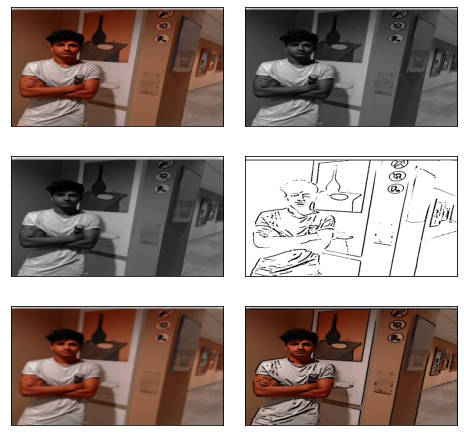

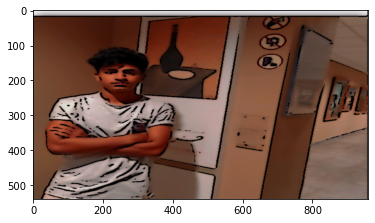

In [29]:

path="khaled.png"
img=cartoonify(path)
plt.imshow(img)